In [144]:
from pymongo import mongo_client
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import re
from matplotlib import font_manager, rc


In [145]:
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [146]:
url = "mongodb://192.168.0.138:27017/"
mgClient = mongo_client.MongoClient(url)

In [147]:
db = mgClient["restaurants"]
col = db["res_list"]

In [159]:
def return_name_list():
    # 데이터 체크 및 리스트화
    name = []
    name_len = []
    for data in col.find():
        for k, v in data.items():
            if k == "name":
                name.append(v)
                name_len.append(len(v))
            
    # 리스트 초기화
    namelist = []
    
    # 영어제외 12글자 이상 식당 이름 리스트화
    reg = re.compile(r'[a-zA-Z]')
    for x in range(0, len(name)):
        if name_len[x] >= 12:
            if reg.match(name[x]):
                pass
            else:
                namelist.append(str(len(name[x]))+","+name[x])
    # 내림차순 정렬
    namelist.sort(reverse=True)
    
    # 이름, 길이 리스트 초기화
    nlist = []
    lenlist = []
    
    # 이름, 길이 리스트 추가
    for x in range(0, 5):
        nlist.append(namelist[x].split(",")[1])
        lenlist.append(namelist[x].split(",")[0])
    return nlist, lenlist

In [160]:
nlist, lenlist = return_name_list()

In [162]:
print(nlist)
print(lenlist)

['플레이그라운드 브루어리 탭룸 송도', '토스티 서울 x horizon16', '코끼리 the salad cafe', '부부요리단1탄 제주흑돼지갑오징어', '비플레이트 바이 브라운브레드']
['18', '18', '18', '17', '15']


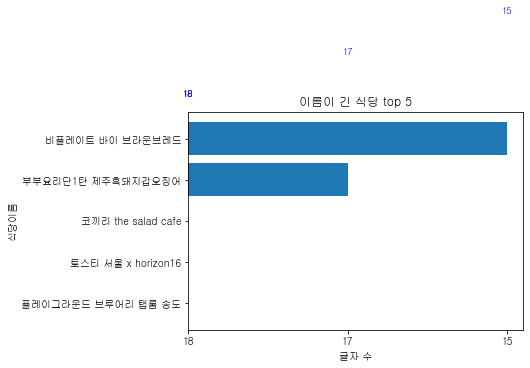

In [182]:
#colors = sns.color_palette('hls',len(lenlist)
plt.title('이름이 긴 식당 top 5')
plt.xlabel('글자 수')
plt.ylabel('식당이름')
plt.barh(nlist,lenlist)
for i, v in enumerate(lenlist):
    plt.text(lenlist[i], v, str(lenlist[i]),
             fontsize=9,
             color="blue",
             horizontalalignment='center',
             verticalalignment='bottom')


plt.show()